## Modeling NLP (Tweets)

In [1]:
pip install nest_asyncio

In [2]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [3]:
pip install scikeras

In [4]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [5]:
#import some libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
tweets_train=pd.read_excel('/content/drive/MyDrive/Tweets Training Model.xlsx')
tweets_test=pd.read_excel('/content/drive/MyDrive/Tweets Testing Model fix.xlsx')

tweets=pd.concat([tweets_train, tweets_test], axis=0)
tweets.reset_index(drop=True, inplace=True)
tweets

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,text_clean,text_eng,Positive,Negative,Neutral,Compound,Sentiment,text_preprocessed
0,Wed Nov 08 07:12:11 +0000 2023,1720000000000000000,"Ganjar Pranowo Hormati Putusan MKMK, Enggan Ko...",0,0,0,1,in,47596019,1720000000000000000,liputan6dotcom,https://twitter.com/liputan6dotcom/status/1722...,ganjar pranowo hormati putusan mkmk enggan kom...,ganjar Pranowo respects mkmk's decision reluct...,0.126,0.109,0.765,0.0772,netral,"['ganjar', 'pranowo', 'hormat', 'putus', 'mkmk..."
1,Tue Nov 07 00:00:00 +0000 2023,1720000000000000000,HEADLINE: Penetapan Pasangan Capres-Cawapres d...,0,0,0,1,in,47596019,1720000000000000000,liputan6dotcom,https://twitter.com/liputan6dotcom/status/1721...,penetapan pasangan caprescawapres di pilpres a...,determination of presidential and vice-preside...,0.153,0.000,0.847,0.4019,netral,"['tetap', 'pasang', 'caprescawapres', 'pilpres..."
2,Mon Nov 06 08:11:05 +0000 2023,1720000000000000000,Cek Fakta: Tidak Benar Ridwan Kamil Kerahkan S...,0,2,0,4,in,47596019,1720000000000000000,liputan6dotcom,https://twitter.com/liputan6dotcom/status/1721...,tidak benar ridwan kamil kerahkan semua warga ...,it's not true that Ridwan Kamil mobilized all ...,0.164,0.101,0.735,0.3544,netral,"['ridwan', 'kamil', 'kerah', 'warga', 'jabar',..."
3,Mon Nov 06 06:47:05 +0000 2023,1720000000000000000,VIDEO: Cak Imin Incar Nomor Urut Satu di Pilpr...,0,6,10,67,in,47596019,1720000000000000000,liputan6dotcom,https://twitter.com/liputan6dotcom/status/1721...,cak imin incar nomor urut satu di pilpres,cak Imin aims for number one in the presidenti...,0.126,0.000,0.874,0.0772,netral,"['cak', 'imin', 'incar', 'nomor', 'urut', 'pil..."
4,Sat Nov 04 00:00:00 +0000 2023,1720000000000000000,HEADLINE: Menanti Pengumuman Timses Capres-Caw...,0,0,0,3,in,47596019,1720000000000000000,liputan6dotcom,https://twitter.com/liputan6dotcom/status/1720...,menanti pengumuman timses caprescawapres pilpr...,waiting for the announcement of the presidenti...,0.141,0.000,0.859,0.4215,positif,"['umum', 'timses', 'caprescawapres', 'pilpres'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,Sat May 13 09:15:00 +0000 2023,1657313482289600000,Pilpres Turki yang akan digelar Minggu (14/5) ...,0,0,0,5,in,69183155,1657313482289600000,detikcom,https://twitter.com/detikcom/status/1657313482...,pilpres turki yang akan digelar minggu besok m...,Turkey's presidential election which will be h...,0.000,0.126,0.874,-0.3818,negatif,"['pilpres', 'turki', 'gelar', 'minggu', 'besok..."
2867,Fri May 12 15:50:00 +0000 2023,1657050499508580096,"Wali Kota Solo yang juga putra Jokowi, Gibran ...",1,2,2,10,in,69183155,1657050499508580096,detikcom,https://twitter.com/detikcom/status/1657050499...,wali kota solo yang juga putra jokowi gibran r...,"The mayor of Solo, who is also the son of Joko...",0.000,0.071,0.929,-0.3182,negatif,"['wali', 'kota', 'solo', 'putra', 'jokowi', 'g..."
2868,Fri May 12 13:40:00 +0000 2023,1657017784012790016,Ketua DPP PPP Achmad Baidowi berbicara soal ad...,0,4,1,9,in,69183155,1657017784012790016,detikcom,https://twitter.com/detikcom/status/1657017784...,ketua dpp pak achmad baidowi berbicara soal ad...,DPP chairman Mr Achmad Baidowi talks about the...,0.000,0.000,1.000,0.0000,netral,"['ketua', 'dpp', 'achmad', 'baidowi', 'bicara'..."
2869,Fri May 12 08:20:00 +0000 2023,1656937253137169920,"Waketum NasDem, Ahmad Ali, mengatakan NasDem t...",0,4,0,2,in,69183155,1656937253137169920,detikcom,https://twitter.com/detikcom/status/1656937253...,waketum nasdem ahmad ali mengatakan nasdem tid...,waketum nasdem ahmad ali said that nasdem had ...,0.000,0.000,1.000,0.0000,netral,"['waketum', 'nasdem', 'ahmad', 'ali', 'nasdem'..."


In [8]:
tweets_train.shape

(2261, 20)

In [9]:
tweets_test.shape

(610, 20)

### TF-IDF

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

X_clean=tweets['text_clean']

# Inisialisasi TfidfVectorizer
stop_words = set(stopwords.words('indonesian'))
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('indonesian'))

# Fit dan transform teks menjadi representasi TF-IDF
# X
X = tfidf_vectorizer.fit_transform(X_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [11]:
X.shape

(2871, 4556)

In [12]:
print(X)

  (0, 3363)	0.06379323315486483
  (0, 2210)	0.21867822046311075
  (0, 1292)	0.19578555999671876
  (0, 1972)	0.4968123197561487
  (0, 1142)	0.3994957738478563
  (0, 2786)	0.3836191593324968
  (0, 3554)	0.3153959533033056
  (0, 1443)	0.4348491127012424
  (0, 3467)	0.2040165338849294
  (0, 1232)	0.16125804082021256
  (1, 4283)	0.4502630268119216
  (1, 122)	0.5466216015802612
  (1, 642)	0.3050048678614315
  (1, 3054)	0.26478887542186724
  (1, 3181)	0.5748046780114684
  (1, 3363)	0.07018899872332254
  (2, 311)	0.22098673796037868
  (2, 146)	0.18874503525295772
  (2, 2420)	0.3252866111023516
  (2, 1567)	0.41729002187185493
  (2, 4493)	0.3780630286442189
  (2, 1869)	0.5100596381678594
  (2, 1708)	0.3371518693033531
  (2, 3667)	0.33904982679771134
  (2, 3363)	0.062283027020646406
  :	:
  (2868, 650)	0.18984416071966412
  (2868, 3363)	0.06314701128542112
  (2868, 1232)	0.15962450592241717
  (2869, 361)	0.3857976411980491
  (2869, 78)	0.3517933951644492
  (2869, 2336)	0.3007020039195271
  (2869,

### Train-Test Split

In [14]:
from scipy.sparse import csr_matrix

X_train = X[:len(tweets_train)]
X_test = X[len(tweets_train):]

In [15]:
X_train.shape

(2261, 4556)

In [16]:
X_test.shape

(610, 4556)

In [25]:
# y
polarity_encode={'negatif':0, 'netral':1, 'positif':2}
y=tweets['Sentiment'].map(polarity_encode)
y

0       1
1       1
2       1
3       1
4       2
       ..
2866    0
2867    0
2868    1
2869    1
2870    1
Name: Sentiment, Length: 2871, dtype: int64

In [18]:
y.shape

(2871,)

In [19]:
y_train = y[:len(tweets_train)]
y_test = y[len(tweets_train):]

In [20]:
y_train.shape

(2261,)

In [21]:
y_test.shape

(610,)

In [ ]:
# y_test.reset_index(drop=True, inplace=True)

### Imbalance Data

#### Train

In [ ]:
tweets_train.Sentiment.value_counts()

netral     1213
positif     850
negatif     198
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

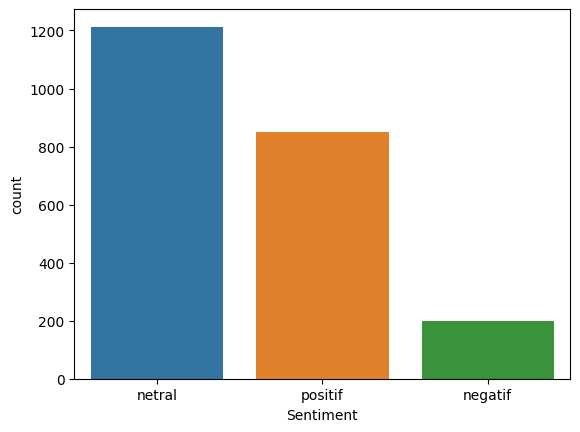

In [ ]:
sns.countplot(x='Sentiment', data=tweets_train)

In [22]:
X_res_train, y_res_train = SMOTE().fit_resample (X_train, y_train)
y_res_train.value_counts()

1    1213
2    1213
0    1213
Name: Sentiment, dtype: int64

<Axes: ylabel='count'>

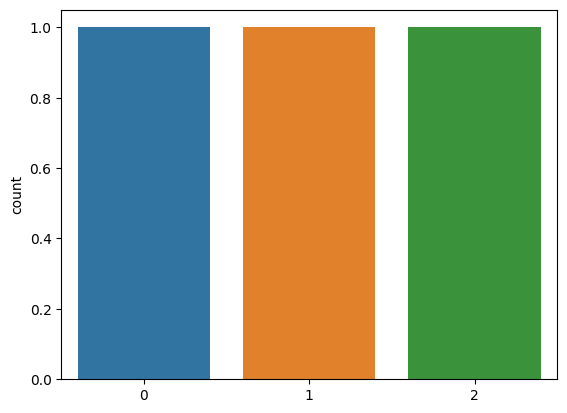

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data yang diberikan
data = {
    1: 1213,
    2: 1213,
    0: 1213
}

# Konversi data ke dalam bentuk yang dapat diplot
categories = list(data.keys())
counts = list(data.values())

# Membuat countplot dengan seaborn
sns.countplot(x=categories)

In [ ]:
X_res_train.shape

(3639, 4556)

In [ ]:
y_res_train.shape

(3639,)

#### Test

In [ ]:
tweets_test.Sentiment.value_counts()

netral     317
positif    242
negatif     51
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

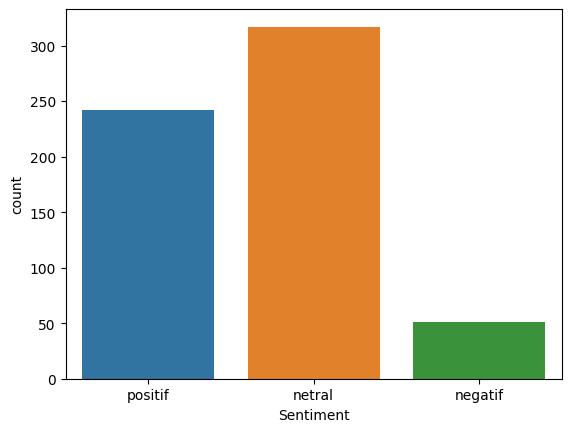

In [ ]:
sns.countplot(x='Sentiment', data=tweets_test)

In [ ]:
X_res_test, y_res_test = SMOTE().fit_resample (X_test, y_test)
y_res_test.value_counts()

2    317
1    317
0    317
Name: Sentiment, dtype: int64

<Axes: ylabel='count'>

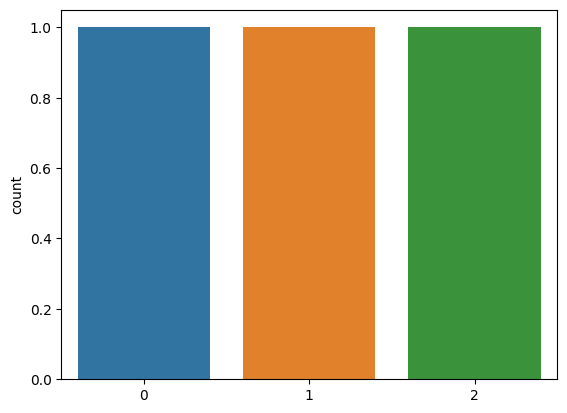

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data yang diberikan
data = {
    1: 317,
    2: 317,
    0: 317
}

# Konversi data ke dalam bentuk yang dapat diplot
categories = list(data.keys())
counts = list(data.values())

# Membuat countplot dengan seaborn
sns.countplot(x=categories)

In [ ]:
X_res_test.shape

(951, 4556)

In [ ]:
y_res_test.shape

(951,)

In [ ]:
# # X_train, X_Test after SMOTE
# X_train = X_res[:X.shape[0]]
# X_test = X_res[X.shape[0]:]

# # y_train, y_test after SMOTE
# y_train = y_res[:len(y)]
# y_test = y_res[len(y):]

### SVC

In [ ]:
# SVM

svm_model = SVC()

svm_model.fit(X_train, y_train)
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.9438301636444051
Accuracy Test :  0.659016393442623
F1 Score Train :  0.9477096814678887
F1 Score Test :  0.7009746840805103


In [ ]:
# SVM Setelah Mengatasi Imbalance

svm_model = SVC(kernel='linear')

svm_model.fit(X_res_train, y_res_train)
y_pred_train = svm_model.predict(X_res_train)
y_pred_test = svm_model.predict(X_res_test)

accuracy_train = accuracy_score(y_pred_train, y_res_train)
accuracy_test = accuracy_score(y_pred_test, y_res_test)
f1_train = f1_score(y_pred_train, y_res_train, average="weighted")
f1_test = f1_score(y_pred_test, y_res_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.9497114591920858
Accuracy Test :  0.5068349106203995
F1 Score Train :  0.9499322693176648
F1 Score Test :  0.5562604149847369


### Random Forest

In [ ]:
# Random Forest

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  1.0
Accuracy Test :  0.6557377049180327
F1 Score Train :  1.0
F1 Score Test :  0.6863575040219613


In [ ]:
# Random Forest Setelah Mengatasi Imbalance

rfc = RandomForestClassifier()

rfc.fit(X_res_train, y_res_train)
y_pred_train = rfc.predict(X_res_train)
y_pred_test = rfc.predict(X_res_test)

accuracy_train = accuracy_score(y_pred_train, y_res_train)
accuracy_test = accuracy_score(y_pred_test, y_res_test)
f1_train = f1_score(y_pred_train, y_res_train, average="weighted")
f1_test = f1_score(y_pred_test, y_res_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  1.0
Accuracy Test :  0.5594111461619348
F1 Score Train :  1.0
F1 Score Test :  0.60361887778891


### XGBoost

In [ ]:
# XGBoost

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.9376382131800088
Accuracy Test :  0.6721311475409836
F1 Score Train :  0.9385038913158207
F1 Score Test :  0.6935570584454511


In [ ]:
# XGBoost Setelah Mengatasi Imbalance

xgb = XGBClassifier()

xgb.fit(X_res_train, y_res_train)
y_pred_train = xgb.predict(X_res_train)
y_pred_test = xgb.predict(X_res_test)

accuracy_train = accuracy_score(y_pred_train, y_res_train)
accuracy_test = accuracy_score(y_pred_test, y_res_test)
f1_train = f1_score(y_pred_train, y_res_train, average="weighted")
f1_test = f1_score(y_pred_test, y_res_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.9535586699642759
Accuracy Test :  0.629863301787592
F1 Score Train :  0.953189610946786
F1 Score Test :  0.6404058306719626


Dari ketiga model tersebut pada masing-masing model membandingkan matrics score antara menggunakan data asli dan juga data yang sudah dilakukan balancing.
Secara overall data asli (tanpa balancing) menghasilkan akurasi yang lebih baik.

Kemudian dari ketiga model tersebut dipilih model SVM karena model tersebut yang memiliki nilai F-Score yang lebih dekat jaraknya antara F-Score training dan testing dibandingkan model lainnya sehingga selanjutnya dilakukan hyperparameter tuning supaya mendapatkan hasil akurasi yang lebih maksimal

### Hyperparameter Tuning

In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV

#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#### SVC

In [ ]:
#Best Model SVC
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'sigmoid', 'poly']}
grid=GridSearchCV(svc, param_grid, cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             verbose=4)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [ ]:
# SVM (Setelah Hyperparameter Tuning)

svm_model = SVC(C=1, gamma=1, kernel='linear')

svm_model.fit(X_train, y_train)
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")
precision_train = precision_score(y_pred_train, y_train, average='weighted')
precision_test = precision_score(y_pred_test, y_test, average='weighted')
recall_train = recall_score(y_pred_train, y_train, average='weighted')
recall_test = recall_score(y_pred_test, y_test, average='weighted')


print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("Precision Train : ", precision_train)
print("Precision Test : ", precision_test)
print("Recall Train : ", recall_train)
print("Recall Test : ", recall_test)

print("\nF1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.8739495798319328
Accuracy Test :  0.6573770491803279
Precision Train :  0.9023515251050139
Precision Test :  0.7420684749016679
Recall Train :  0.8739495798319328
Recall Test :  0.6573770491803279

F1 Score Train :  0.8801215958951463
F1 Score Test :  0.6901982908556823


#### Best Model SVC

In [ ]:
# SVC (Best Parameters)

svm_model = SVC(kernel = 'sigmoid')

svm_model.fit(X_train, y_train)
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")
precision_train = precision_score(y_pred_train, y_train, average='weighted')
precision_test = precision_score(y_pred_test, y_test, average='weighted')
recall_train = recall_score(y_pred_train, y_train, average='weighted')
recall_test = recall_score(y_pred_test, y_test, average='weighted')


print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("Precision Train : ", precision_train)
print("Precision Test : ", precision_test)
print("Recall Train : ", recall_train)
print("Recall Test : ", recall_test)

print("\nF1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)

Accuracy Train :  0.8036267138434321
Accuracy Test :  0.6655737704918033
Precision Train :  0.8666880947793325
Precision Test :  0.7522763749724533
Recall Train :  0.8036267138434321
Recall Test :  0.6655737704918033

F1 Score Train :  0.8208539603609786
F1 Score Test :  0.6974657264740153


Pada Model yang telah dilakukan evaluasi Hyperparameter tuning mendapatkan hasil yang lebih baik dari model sebelumnya tetapi setelah dilakukan pencarian parameter dengan kernel = 'sigmoid' ternyata menghasilkan hasil yang lebih baik karena perbedaan F1-Score antara data train dan test lebih dekat sehingga dapat meminimalkan overfitting walaupun nilai metrics scorenya lebih kecil sedikit

### Confusion Matrix

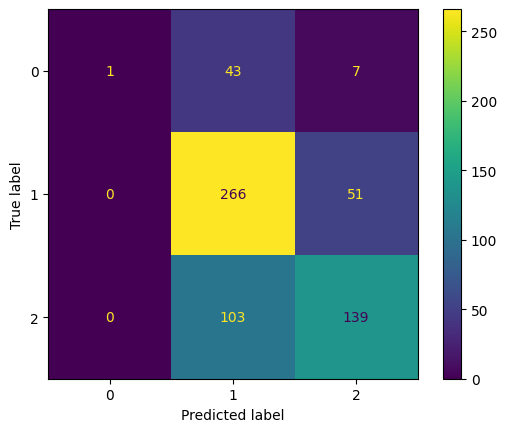

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()